In [1]:
%matplotlib inline

import numpy as np
import statsmodels.api as sm
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import datetime

import sys
sys.path.append('C:\\projects\\finances.git\\finances')

from market.market_data import MarketData
mkt = MarketData()

C:\Anaconda3\envs\finance\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [2]:
from porfolio.portfolio import PortFolio

Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


In [3]:
portfolio_assets = {
    'BTC': 0.007,
    'ETH': 2.14081,
    'XRP': 922.5,
    'ADA': 926,
    'XLM': 929.07,
    'LTC': 1.0,
    'TRX': 2760,
    'UBQ': 18.222,
    'BIS': 36.6,
    'IOTA': 47.553,
    'EMC2': 45,
    'FUN': 633.366,
    'ADST': 136.71
}

all_portfolio_assets = {
    'BTC': 0,
    'DASH': 0,
    'XMR': 0,
    'BCH': 0,
    'NEO': 0,
    'NEM': 0,
    'ETH': 0,
    'XRP': 0,
    'LTC': 0,
    'ADA': 0,
    'UBQ': 0,
    'BIS': 0,
    'IOTA': 0,
    'EMC2': 0,
    'TRX': 0,
    'FUN': 0,
    'XLM': 0
}

assets_effective_price = {
    'BTC': 0.1,
    'ETH': 454.96,
    'XRP': 0.772,
    'ADA': 0.404,
    'XLM': 0.378,
    'LTC': 208.23,
    'TRX': 0.0668,
    'UBQ': 5.7,
    'BIS': 3.48,
    'IOTA': 3.08,
    'EMC2': 0.769,
    'FUN': 0.0897,
    'ADST': 0.817   
}

In [4]:
import pylab as plt
import seaborn as sns
from pprint import pprint

sns.set()

myportfolio = PortFolio(
    name= 'PedroPortfolio'
    )

Loaded portfolio database from C:\projects\finances.git\finances\porfolio\PedroPortfolio\assets_allocation_data.csv


# Portfolio Comparison

In [5]:
myportfolio.assets_data

ADA    ADST  BCH        BIS       BTC      DASH  EMC2  \
2018-01-01  926.000  136.71  0.0  36.600000  0.007000  0.000000  45.0   
2018-02-06    0.073  136.71  0.0  36.592335  0.080743  0.286593  45.0   

                ETH       FUN    IOTA  LTC   NEO       TRX        UBQ     XLM  \
2018-01-01  2.14081   633.366  47.553  1.0  0.00  2760.000  18.222000  929.07   
2018-02-06  2.14081  2550.366  47.553  1.5  2.04     0.237  18.222222  279.07   

                XMR    XRP  
2018-01-01  0.00000  922.5  
2018-02-06  1.32867  130.0

## Optimize the portfolio continuously

In [6]:
def apply_optimization(
    assets=all_portfolio_assets,
    start_date = datetime.datetime(2017,11,3),
    end_date = datetime.datetime.now(),
    update_frequency = 7
    ):

    time_delta = datetime.timedelta(days=update_frequency)
    time = start_date
    value = 100

    portfolio=PortFolio()
    portfolio.assets=assets
    while time<end_date:
        optimal_df = portfolio.optimize_allocation(
            target_return=0.1,
            projection_steps=update_frequency,
            date=time,
            value_to_invest=value)
        
        optimal_assets = optimal_df['coin_quantities'].to_dict()
        portfolio.insert_assets_at_date(assets=optimal_assets, date=time)
        
        time+=time_delta
        portfolio.update_data()
        value=portfolio.values_data.loc[:time]['TOTAL'].iloc[-1]
    return portfolio

optimized_pfl=apply_optimization()

Loaded crypto currency database from C:\projects\finances.git\finances\market\data_base\crypto_currencies\main_crypto_eur_database.csv


### optimize only at the beginning

In [7]:
start_date = datetime.datetime(2017,11,3)
optimized_once_pfl = PortFolio()
optimized_once_pfl.assets = all_portfolio_assets

optimal_df = optimized_once_pfl.optimize_allocation(target_return=0.25, projection_steps=100, date=start_date, value_to_invest=100)
optimal_assets = optimal_df['coin_quantities'].to_dict()
optimized_once_pfl.insert_assets_at_date(assets=optimal_assets, date=start_date)

ADA       BCH        BIS       BTC      DASH  EMC2      ETH  \
2017-11-03  376.07405  0.006852  12.484553  0.000649  0.046714   0.0  0.05261   

                   FUN       IOTA       LTC        NEM       NEO          TRX  \
2017-11-03  414.884569  16.077099  0.182269  27.390922  0.363365  2071.481718   

                UBQ         XLM       XMR        XRP  
2017-11-03  4.13426  244.080607  0.055714  30.050535

### real one

In [8]:
myportfolio.insert_assets_at_date(assets=portfolio_assets, date=start_date)
myportfolio.update_data()

### compare

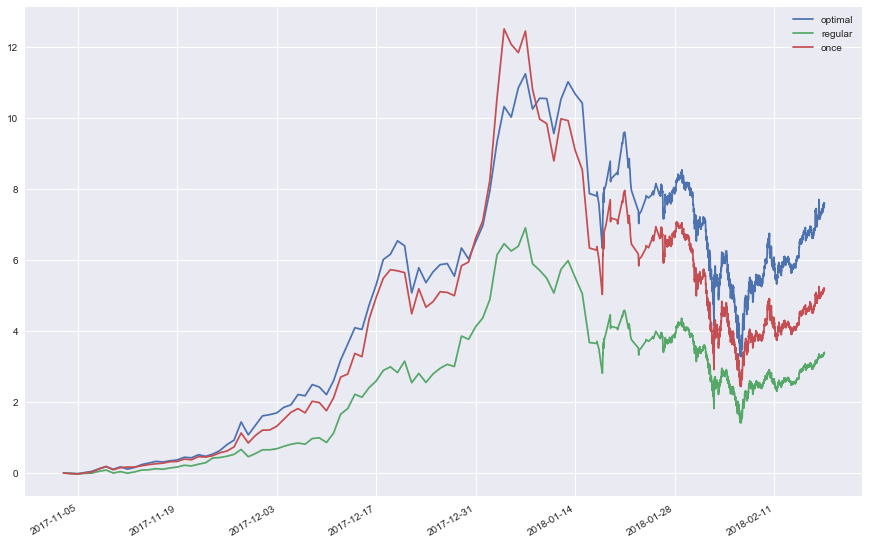

In [9]:
fig = plt.figure(figsize=(15,10))

optimized_pfl.relative_variation_since(start_date=start_date)['TOTAL'].plot(label='optimal')
myportfolio.relative_variation_since(start_date=start_date)['TOTAL'].plot(label='regular')
optimized_once_pfl.relative_variation_since(start_date=start_date)['TOTAL'].plot(label='once')
plt.legend()

In [10]:
print(optimized_pfl.relative_variation_since(start_date=start_date)['TOTAL'].iloc[-1])
print(myportfolio.relative_variation_since(start_date=start_date)['TOTAL'].iloc[-1])
print(optimized_once_pfl.relative_variation_since(start_date=start_date)['TOTAL'].iloc[-1])

7.5908121111
3.39453695337
5.19152764981


# Apply for random periods

First apply to the all assets:

In [44]:
import random
fullrets = mkt.crypto_returns_data(
    symbols=list(all_portfolio_assets.keys())
    ).dropna()

time_delta_stress_test=datetime.timedelta(days=60)

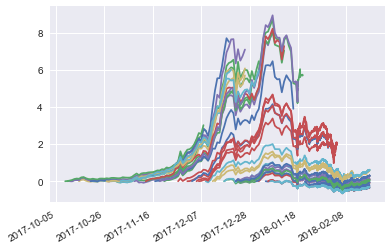

In [45]:
return_sample=[]
for k in range(50):
    start_test = random.choice(fullrets.index)
    end_test=start_test+time_delta_stress_test
    pfl=apply_optimization(
        assets=all_portfolio_assets,
        start_date = start_test,
        end_date=end_test,
        update_frequency = 14
        )
    value=pfl.relative_variation_since(start_date=start_test)['TOTAL'].loc[:end_test]
    return_sample.append(value.iloc[-1])
    value.plot()

{'boxes': [<matplotlib.lines.Line2D at 0x203725e94e0>],
 'caps': [<matplotlib.lines.Line2D at 0x203725e9f98>,
 'fliers': [<matplotlib.lines.Line2D at 0x203725f1cf8>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x203725f1898>],
 'whiskers': [<matplotlib.lines.Line2D at 0x203725e9668>,
  <matplotlib.lines.Line2D at 0x203725e9b38>]}

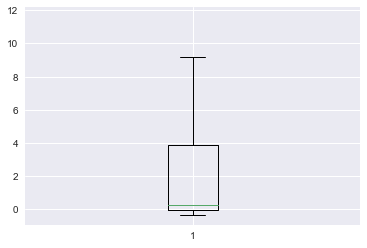

In [14]:
plt.boxplot(return_sample)

### Apply to selected portfolios

In [41]:
fullrets = mkt.crypto_returns_data(
    symbols=['BTC','LTC','XRP','ETH']
    ).dropna()
data_df = pd.DataFrame(columns=['optimal', 'raposas', 'eth', 'btc', 'ltc', 'xrp'])
assets_list_dict={
    'optimal':{'BTC':0, 'LTC':0, 'XRP':0, 'ETH':0},
    'raposas':{'XRP':0, 'ETH':0},
    'eth':{'ETH':0},
    'btc': {'BTC':0},
    'ltc': {'LTC':0},
    'xrp': {'XRP':0}
    }

for pfl in assets_list_dict:
    assets = assets_list_dict[pfl]
    return_sample=[]
    for k in range(100):
        start_test = random.choice(fullrets.index)
        end_test=start_test+time_delta_stress_test
        portfolio=apply_optimization(
            assets=assets,
            start_date = start_test,
            end_date=end_test,
            update_frequency = 7
            )
        value=portfolio.relative_variation_since(start_date=start_test)['TOTAL'].loc[:end_test]
        return_sample.append(value.iloc[-1])
    data_df[pfl] = return_sample
    
data_df


optimal    raposas       eth       btc       ltc        xrp
0   2.443464   0.687784  0.057914  0.417971  0.207762   0.400366
1  -0.271082  -0.050617  0.520322  0.571488  0.443060  -0.266177
2   1.077028  -0.469093  1.658619  0.306017 -0.047196   0.027023
3   0.300661   1.238294  0.877099  0.524920 -0.163980  -0.448437
4   1.197835   0.334497  0.280114  0.430745 -0.006827  -0.300344
5  -0.138318  -0.114263  0.003193  0.489941  0.157970  -0.255570
6   0.308668   0.302805 -0.081947  0.287331  0.240499   0.172124
7  -0.054281   0.679240  1.104654  0.509956  0.021567   0.183140
8   0.380350   0.174707  0.005357  0.172839 -0.173678   7.231486
9   0.436496  -0.205580  5.938608  0.044345  0.444838   0.612280
10  1.010653  10.284388  0.026665 -0.559028  0.051339  -0.051967
11 -0.215806  -0.093753  0.542544  0.286403  2.648376  -0.255748
12 -0.005457   0.470808 -0.037684  0.264800 -0.128588  -0.459719
13  0.126497   1.840604  0.320161  0.076025  0.050182  -0.052717
14  3.437326   1.657858  2.399443  0.119621  1.943095  -0.048643
15  0.259893   0.746103  0.149370  0.942191  0.067612   0.247117
16  0.677880   1.297836  0.017329  0.762247  0.510360  20.668201
17  0.186743   0.229733  0.391827  0.797727  0.302088   0.023253
18 -0.217033   5.026783  2.999653 -0.523298 -0.087157   0.209466
19  0.282196   0.404991 -0.398942  0.222621  2.168191  -0.623818
20 -0.050796   0.516073  0.348499  0.742037 -0.175049   0.375591
21 -0.142017  -0.138440  2.999653  0.741190  0.204616   0.327771
22  2.679820   0.312302 -0.172859  0.278733  0.485431  -0.623818
23  0.515767   8.934615  3.793184  0.466414  0.204294   0.284052
24  0.117718   0.718999 -0.323946  0.309011  0.408791  -0.384140
25  0.162857   2.107951  0.071757  1.282254  0.272973   1.918679
26  0.122265  -0.252138  0.364748  0.238347  0.120884  -0.105104
27  0.258519  -0.268282  0.152360  0.251291 -0.040352  -0.185835
28  2.079519   0.127588 -0.050173  0.154682 -0.012591   4.053829
29  0.852544   7.651639  2.986638 -0.100050  0.020008  -0.143791
..       ...        ...       ...       ...       ...        ...
70  3.427422  -0.175399 -0.323021  0.016739  0.443472   5.020914
71  0.856677  -0.013964  0.750660  1.621033  0.004474   0.054530
72  1.795837  -0.100123  0.209509  0.166441  0.012756   0.018478
73  0.001390   0.427391  3.389039  1.317614  0.172877   0.062560
74 -0.003712   5.258277  2.744292  0.284205 -0.018349   0.291580
75  0.520114   0.005138  0.071757 -0.057014 -0.406897  -0.376372
76  2.284555  -0.323353  1.392673  0.238347  0.104765   0.402832
77  3.044573  -0.239284 -0.046658  0.363770 -0.076255   0.065336
78  1.805094  -0.334992 -0.007190  0.263445 -0.158748  -0.211884
79  0.145394   2.414016  0.057128  0.256321  0.030938   0.484980
80  0.247323   0.005090 -0.673874  0.365507  0.091187  -0.047552
81  0.062938   3.225968 -0.153282  0.178077 -0.169907  -0.304563
82  0.116215   0.221447 -0.343788  0.063273  2.466155   0.065336
83  0.024748  -0.418974  3.795827  0.702691 -0.091447  -0.095188
84 -0.008178  -0.026004  0.028679 -0.231758  1.554969   0.071491
85 -0.178781   0.078968 -0.085769  0.142409  3.259500   0.446138
86 -0.019364  -0.208762 -0.375485 -0.143344 -0.226922  -0.144088
87  0.319503   0.059782 -0.002305 -0.116427 -0.145768  -0.152417
88  0.256995   6.238028  0.823019  0.224057  0.140598   0.201507
89  0.459435   0.219164  3.023958  0.478110 -0.097065   0.204112
90  0.649006   2.094882  3.063787  0.172997  3.032184   0.191787
91  0.755615   0.154964 -0.048380  0.648610 -0.114042   8.316136
92  0.107948   0.151424  3.343677 -0.068542 -0.017695  -0.445361
93  1.743127  11.057336 -0.030651  0.597945 -0.004914  -0.120006
94  0.783305   0.101950  0.651362 -0.000563  0.073316   8.291773
95  0.821045   0.027091  3.793184 -0.076759 -0.140978   0.006845
96  0.790815   0.723164  2.730046  2.473381 -0.007024  -0.076616
97 -0.018073  12.882823  0.075746  0.146360  1.092667   0.549654
98  0.746185   2.193367  0.071757  0.653540  0.063447  -0.011752
99  2.713598   1.570926  0.364748  0.371

optimal    0.702961
raposas    0.499032
eth        0.645684
btc        0.771145
ltc        0.457692
xrp        0.252181
dtype: float64


(-1, 4)

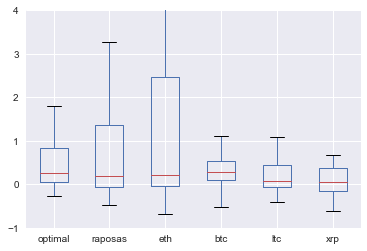

In [42]:
data_df.boxplot()
print(data_df.mean()/data_df.std())
plt.ylim(-1,4)